In [2]:
import os
import nltk
import nltk.corpus
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [101]:
data = pd.read_csv('D:/dataset.csv')


In [4]:
data.head()

,Unique Id,Image,Brand,Title,Specifications,Highlights,Price,Rating
0,0697f1714bf848c4b1cacc39a46a4e8b,https://images-na.ssl-images-amazon.com/images...,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7
1,f04481fec10c4a538634d01e04bb45ed,https://images-na.ssl-images-amazon.com/images...,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0
2,754577bc25b24641ab1b0aef5e19db73,https://images-na.ssl-images-amazon.com/images...,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3
3,b4c5f6d192124d70919946ea754cce56,https://images-na.ssl-images-amazon.com/images...,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0
4,b1a1b9c3926b4da1ab0040ea81b41e3e,https://images-na.ssl-images-amazon.com/images...,GBTIGER,"120 inch Portable Projection Screen with Bag, ...","[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0


In [102]:
data.shape


(51500, 8)

In [103]:
#finding duplicates in data
df=data[data.duplicated()]
print("number of duplicate rows:",df.shape)

number of duplicate rows: (0, 8)


In [104]:
data=data.drop_duplicates() 
df.shape

(0, 8)

In [100]:
data.isnull().sum()

Unique Id            0
Image             3533
Brand                3
Title                1
Specifications       0
Highlights           2
Price                0
Rating               0
dtype: int64

In [23]:
data.dtypes

Brand              object
Title              object
Specifications     object
Highlights         object
Price              object
Rating            float64
weight             object
dtype: object

In [105]:
#dropping irrevalent columns
data.drop(['Unique Id', 'Image'], inplace=True, axis=1)

In [106]:
#dropping na's
data.dropna(inplace=True)
data.isnull().sum()

Brand             0
Title             0
Specifications    0
Highlights        0
Price             0
Rating            0
dtype: int64

In [107]:
for idx, row in data.iterrows():
    r = row[2]
    r = r.strip('[')
    r = r.strip(']')
    r = r.split(',')
    for thing in r:
        if 'Item Weight' in thing:
            weight = thing
            weight = weight.strip()
            for stripper in ["'", "{", "}", ":", "Item Weight"]:
                weight = weight.strip(stripper)
            weight = weight.split(':')
            weight = weight[-1]
            weight = weight.strip()
            weight = weight.strip("'")
            weight = weight.strip('ounces')
            weight = weight.strip('pound')
            weight = weight.strip()
            data.loc[idx, 'weight'] = weight

In [108]:
  data["weight"]=data["weight"].astype("float64")
data["weight"]=data["weight"].fillna(data["weight"].mean())
data["weight"].isnull().sum()

0

In [109]:

len(data)

data["Highlights"].count()

51494

In [110]:
mean = 0
row_count = 0
for row in data['Price']:
    if row != 'not_available':
        mean += float(row)
        row_count += 1

In [111]:
mean = mean / row_count

In [112]:
for idx, row in data.iterrows():
    if row['Price'] == 'not_available':
        data.loc[idx, 'Price'] = mean
        

In [113]:
 data["Highlights"].isnull().sum()

0

In [114]:
 data["Highlights"].dropna() 

0        Make sure this fits by entering your model num...
1        Material: Made of elastic synthetic cotton, so...
2        Make sure this fits by entering your model num...
3        Make sure this fits by entering your model num...
4        Make sure this fits by entering your model num...
5        Make sure this fits by entering your model num...
6        Make sure this fits by entering your model num...
7        Make sure this fits by entering your model num...
8        Beautiful and luxurious, high quality sparkle ...
9        Compatible with: FITBIT VERSA\nIncludes 2 Quic...
10       [Compatibility]: iPhone 7 Plus Case compatible...
11       Premium material - The cell phone ring stands ...
12       Backup Parking Camera Suitable for Chevrolet C...
13       Make sure this fits by entering your model num...
14       -✔HD DISPLAY: Our Android & IOS Smartwatch is ...
15       Make sure this fits by entering your model num...
16       Makes a wonderful shower gift and a perfect ad.

In [115]:
data["Price"].astype("float")

0         12.990000
1          9.990000
2        379.180000
3         19.970000
4         27.990000
5        449.000000
6         57.692697
7        999.000000
8          5.870000
9         16.950000
10        12.990000
11         7.990000
12        39.990000
13        21.040000
14        24.990000
15        18.430000
16         9.950000
17        24.990000
18        36.210000
19        13.950000
20        57.692697
21        12.000000
22        57.692697
23        16.990000
24        69.990000
25        57.692697
26         8.990000
27        15.990000
28        38.960000
29        49.000000
            ...    
51470     57.692697
51471     39.000000
51472     57.692697
51473    485.330000
51474     15.950000
51475    500.000000
51476     57.692697
51477     68.950000
51478    985.790000
51479      9.000000
51480      7.000000
51481     29.000000
51482      8.890000
51483     57.990000
51484     10.950000
51485      8.330000
51486     10.000000
51487     24.150000
51488      5.500000


In [116]:
corpus=[]  
for i in range(0,51494):
      high=re.sub('[^a-zA-Z]',' ',data["Highlights"][0])
      high=high.lower()
      high=high.split()
      ps=PorterStemmer()
      high=[ps.stem(word) for word in high if not word in stopwords.words('english')]        
      high=' '.join(high) 
      corpus.append(high)  

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=7)

In [118]:
s=cv.fit_transform(corpus).toarray()
s.shape

(51494, 7)

In [124]:
#please run the comment first and then run down line to comment
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=7)
#s=cv.fit_transform(corpus).toarray().tolist()
s=cv.fit_transform(corpus).toarray()
data["Corpus"]=s
data

,Brand,Title,Specifications,Highlights,Price,Rating,weight,Corpus
0,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7,3.200000,1
1,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0,5.433714,1
2,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3,7.700000,1
3,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0,7.800000,1
4,GBTIGER,"120 inch Portable Projection Screen with Bag, ...","[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0,2.100000,1
5,Bogen,Bogen GS150D Gold Series Amplifier,[{'Product Dimensions': '16.5 x 3.5 x 13.5 inc...,Make sure this fits by entering your model num...,449,5.0,18.500000,1
6,Green-L,GREEN.L 55mm Slim Adjustable 4 Points Star Fil...,[{'Package Dimensions': '6.8 x 3.4 x 1.2 inche...,Make sure this fits by entering your model num...,57.6927,0.0,3.360000,1
7,Photo4Less,Canon EOS Rebel T7i DSLR Camera + EF-S 18-55mm...,"[{'Product Dimensions': '13 x 8 x 23 inches'},...",Make sure this fits by entering your model num...,999,0.0,12.800000,1
8,Berisfords,"Berisfords 10 mm Razzle Ribbon, Forest and Gold","[{'Item Weight': '4.2 ounces'}, {'Package Dime...","Beautiful and luxurious, high quality sparkle ...",5.87,0.0,4.200000,1
9,Art-Strap,Compatible with Fitbit Versa Leather Watch Wri...,[{'Package Dimensions': '6.9 x 2.2 x 0.5 inche...,Compatible with: FITBIT VERSA\nIncludes 2 Quic...,16.95,0.0,0.480000,1


In [125]:
data.head()

,Brand,Title,Specifications,Highlights,Price,Rating,weight,Corpus
0,RoadPro,RoadPro RP-100C 10' AM/FM Antenna Coaxial Cable,"[{'Brand': 'RoadPro'}, {'Model': 'RP-100C'}, {...",Make sure this fits by entering your model num...,12.99,4.7,3.200000,1
1,YSense,5-6 Packs Baby Girl Cute Headband - Turban Hea...,[{}],"Material: Made of elastic synthetic cotton, so...",9.99,5.0,5.433714,1
2,Wooden Camera,Wooden Camera - PL Mount (Weapon/Scarlet-W/Epi...,[{'Product Dimensions': '3.2 x 1.8 x 3.2 inche...,Make sure this fits by entering your model num...,379.18,3.3,7.700000,1
3,Global-store,Globalstore 12x25 Folding High-Grade Binocular...,[{'Product Dimensions': '3.9 x 3.9 x 2 inches'...,Make sure this fits by entering your model num...,19.97,5.0,7.800000,1
4,GBTIGER,"120 inch Portable Projection Screen with Bag, ...","[{'Brand Name': 'GBTIGER'}, {'Item Weight': '2...",Make sure this fits by entering your model num...,27.99,3.0,2.100000,1


In [126]:

from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

data["Brand"]=l.fit_transform(data["Brand"])
data["Title"]=l.fit_transform(data["Title"])

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

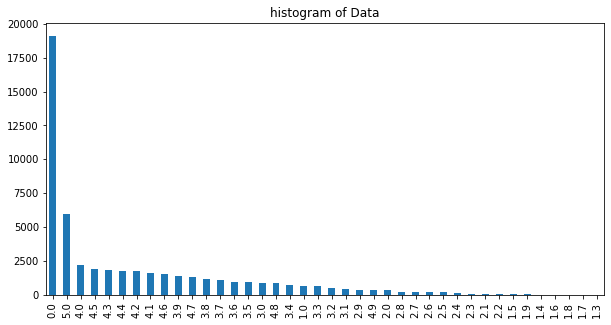

In [128]:
data.Rating.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("histogram of Data")
plt.show()


,Brand,Title,Rating,weight,Corpus
Brand,1.000000,0.573768,-0.007881,-0.015014,NaN
Title,0.573768,1.000000,0.009679,-0.016599,NaN
Rating,-0.007881,0.009679,1.000000,-0.021585,NaN
weight,-0.015014,-0.016599,-0.021585,1.000000,NaN
Corpus,NaN,NaN,NaN,NaN,NaN


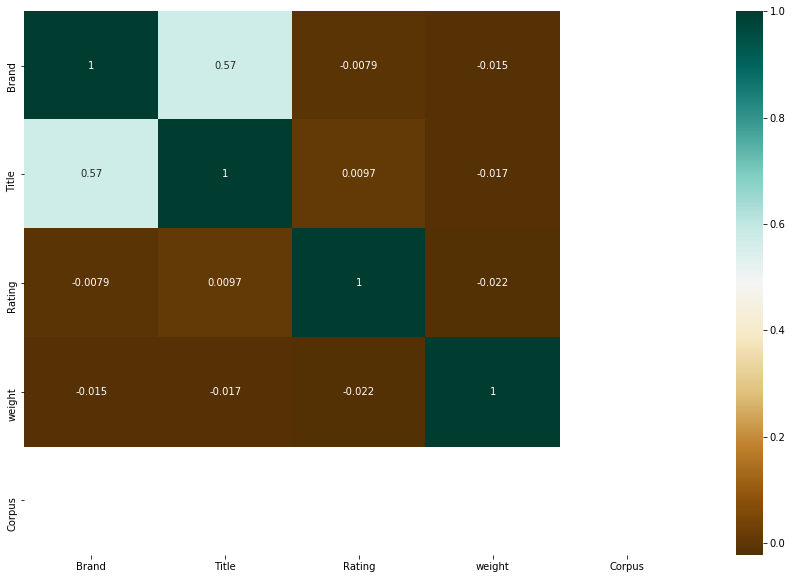

In [129]:
plt.figure(figsize=(15,10))
c= data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c


(array([8322., 4472., 4926., 4837., 4479., 4757., 4681., 4747., 4885.,
        5388.]),
 array([    0. ,  2573.9,  5147.8,  7721.7, 10295.6, 12869.5, 15443.4,
        18017.3, 20591.2, 23165.1, 25739. ]),
 <a list of 10 Patch objects>)

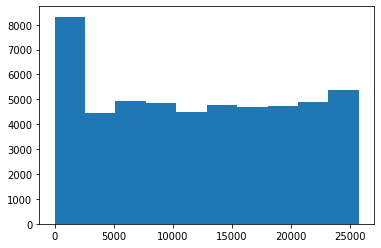

In [130]:
plt.hist( data["Brand"])

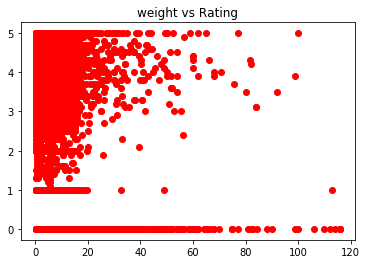

In [131]:
plt.scatter(data["weight"], data["Rating"], color='red')

plt.title("weight vs Rating")

plt.show()

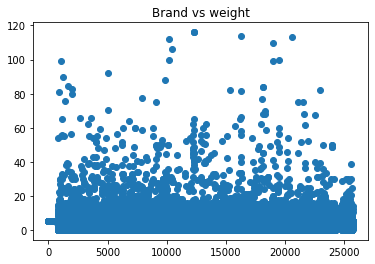

In [132]:

plt.scatter(data["Brand"],data["weight"])
plt.title("Brand vs weight")

plt.show()

In [133]:
X=data.drop("Price",axis=1)
y=data["Price"]

In [143]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [135]:
X_train.keys()

Index(['Brand', 'Title', 'Specifications', 'Highlights', 'Rating', 'weight',
       'Corpus'],
      dtype='object')

In [144]:
X_train.drop(['Specifications', 'Highlights'], inplace=True, axis=1)
X_test.drop(['Specifications', 'Highlights'], inplace=True, axis=1)

C:\Users\tharu\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [145]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [146]:
model.fit(X_train,y_train)

C:\Users\tharu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [73]:
X_test.head(2)

,Brand,Title,Rating,weight,Corpus
28983,16866,33030,0.0,5.433714,1
19598,11860,23616,5.0,5.433714,1


In [74]:
y_test.head(2)

28983    34.9
19598    8.59
Name: Price, dtype: object

In [147]:
pred=model.predict(X_test)

In [148]:
model.score(X_test,y_test)

0.13369632818363675

In [149]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [150]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
lr.predict(X_test)

array([44.48276441, 82.47919233, -1.439813  , ..., 45.57307377,
       69.36748937, 40.25899181])

In [152]:
lr.score(X_test,y_test)

0.034893448925497283